In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../utils/")
sys.path.append("../")

In [3]:
import metrics
from agg_crossfit_results import *

In [4]:
pd.set_option('display.max_rows', 500)


In [5]:
set_name = 'published_temporal_set'
metrics_type = 'auc'

In [6]:
model_mapping = {
    'BART-Single': 1,
    'BART-Adapter-Single': 2,
    'BART-BiHNet-Single': 3,
    'BART-Adapter-Vanilla':4, 
    'BART-BiHNet+Vanilla':5,
    'BART-BiHNet+Reg':6,
    'BART-BiHNet+EWC':7,
    'BART-Adapter-Multitask':8,
    'BART-BiHNet-Multitask':9}

# Few shot

In [7]:
dir_dict = {"BART-BiHNet+Reg":f"../runs/BiHNet_Reg_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet+EWC":f"../runs/BiHNet_ewc_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-Adapter-Multitask": f"../runs/adpter_mtl_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet-Multitask": f"../runs/mtl_hnet_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-Adapter-Vanilla": f"../runs/adapter_vanilla_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet+Vanilla": f"../runs/BiHNet_vanilla_{set_name}_0.01_s64_d256_limit/1e-4/0/",
#             "BART-Single": f"../runs/single_{set_name}_fs_0.01_s64_d256_limit/1e-4/0/",
#             "BART-Adapter-Single": f"../runs/adapter_single_{set_name}_fs_0.01_s64_d256_limit/1e-4/0/",
#             "BART-BiHNet-Single": f"../runs/BiHNet_single_{set_name}_fs_0.01_s64_d256_limit/1e-4/0/",
           }

### Fewshot Downstream during Upstream

In [14]:
def get_fs_progress_df(dir_dict, metrics_type):
    dfs = []
    for alg in dir_dict:
        print(alg)
        for with_dash in [True, False]:
            for i in range(3):
                df =  make_few_shot_result_table(dir_dict[alg], postfix=f"_naive_16shot_task_{i}", metrics_type=metrics_type, with_dash=with_dash)
                if df.empty:
                    print("df", df)
                    print(alg, with_dash, "hereeee")
                    continue
                if "task_detail" in df.columns:
                    df = pd.DataFrame(df.groupby(["task_name", "task_detail"])[metrics_type].max()).reset_index()
                else:
                    df = pd.DataFrame(df.groupby(["task_name"])[metrics_type].max()).reset_index()
                df["alg"] = alg
                df["up_task"] = i
                dfs.append(df)
    all_fs_df = pd.concat(dfs)
    all_fs_df = all_fs_df[[metrics_type, "task_name", "task_detail",  "alg", "up_task"]]
    all_fs_df = all_fs_df.rename(columns={metrics_type: f'few-shot-{metrics_type}', 
                                                      'alg': 'model', 
                                                      'task_name': 'dataset', 
                                                      'task_detail': 'task'})
    return all_fs_df

In [16]:
fs_on_upstream_df = get_fs_progress_df(dir_dict, metrics_type='auc')

BART-BiHNet+Reg
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg True hereeee
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg True hereeee
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg True hereeee
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot_task_0.csv
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg False hereeee
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot_task_1.csv
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg False hereeee
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot_task_2.csv
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+Reg False hereeee
BART-BiHNet+EWC
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+EWC True hereeee
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+EWC True hereeee
df Empty DataFrame
Columns: []
Index: []
BART-BiHNet+EWC True hereeee
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16sho

<Axes: xlabel='up_task', ylabel='few-shot-auc'>

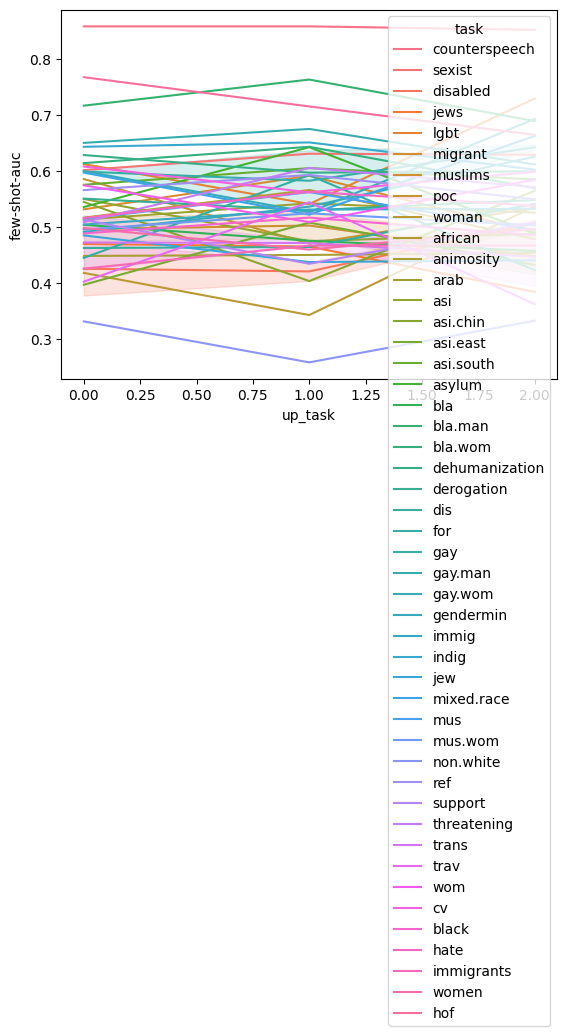

In [22]:
fs_on_upstream_df[fs_on_upstream_df.task =="sexist"]

import seaborn as sns
sns.lineplot(data=fs_on_upstream_df, x = "up_task", y ="few-shot-auc", hue="task")

### Best model fewshot performance

In [53]:
def get_fs_df(dir_dict, metrics_type):
    dfs = []
    for alg in dir_dict:
        print(alg)
        for with_dash in [True, False]:
            df =  make_few_shot_result_table(dir_dict[alg], postfix="_naive_16shot", metrics_type=metrics_type, with_dash=with_dash)
            if df.empty:
                print("df", df)
                print(alg, with_dash, "hereeee")
                continue
            if "task_detail" in df.columns:
                df = pd.DataFrame(df.groupby(["task_name", "task_detail"])[metrics_type].max()).reset_index()
            else:
                df = pd.DataFrame(df.groupby(["task_name"])[metrics_type].max()).reset_index()
            df["alg"] = alg
            dfs.append(df)
    all_fs_df = pd.concat(dfs)
    all_fs_df = all_fs_df[[metrics_type, "task_name", "task_detail",  "alg"]]
    all_fs_df = all_fs_df.rename(columns={metrics_type: f'few-shot-{metrics_type}', 
                                                      'alg': 'model', 
                                                      'task_name': 'dataset', 
                                                      'task_detail': 'task'})
    return all_fs_df

In [55]:
fs_auc_df = get_fs_df(dir_dict, metrics_type='auc')
fs_f1_df = get_fs_df(dir_dict, metrics_type='f1')

BART-BiHNet+Reg
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet+EWC
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-Adapter-Multitask
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet-Multitask
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-Adapter-Vanilla
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet+Vanilla
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet+Reg
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet+EWC
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-Adapter-Multitask
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-BiHNet-Multitask
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+)_fewshot_at_-1_naive_16shot.csv
BART-

In [58]:
fs_auc_df[fs_auc_df.model=="BART-Adapter-Vanilla"]

,few-shot-auc,dataset,task,model
0,0.947467,cad,counterspeech,BART-Adapter-Vanilla
1,0.800860,cmsb,sexist,BART-Adapter-Vanilla
2,0.904717,conan,disabled,BART-Adapter-Vanilla
3,0.929167,conan,jews,BART-Adapter-Vanilla
4,0.826356,conan,lgbt,BART-Adapter-Vanilla
5,0.937178,conan,migrant,BART-Adapter-Vanilla
6,0.973152,conan,muslims,BART-Adapter-Vanilla
7,0.705530,conan,poc,BART-Adapter-Vanilla
8,0.945992,conan,woman,BART-Adapter-Vanilla
9,0.697561,dygen,african,BART-Adapter-Vanilla


In [16]:
fs_df = fs_f1_df.merge(fs_auc_df, on=['model', 'dataset', 'task'])

In [17]:
fs_df = fs_df.fillna("-")

In [18]:
fs_df.groupby("model")['few-shot-f1'].mean()

model
BART-Adapter-Multitask    0.288102
BART-Adapter-Vanilla      0.256353
BART-BiHNet+EWC           0.257523
BART-BiHNet+Reg           0.298919
BART-BiHNet+Vanilla       0.270319
BART-BiHNet-Multitask     0.257100
Name: few-shot-f1, dtype: float64

In [19]:
fs_df.groupby("model")['few-shot-auc'].mean()

model
BART-Adapter-Multitask    0.816277
BART-Adapter-Vanilla      0.764620
BART-BiHNet+EWC           0.765808
BART-BiHNet+Reg           0.818512
BART-BiHNet+Vanilla       0.771721
BART-BiHNet-Multitask     0.795745
Name: few-shot-auc, dtype: float64

In [20]:
fs_df['model_order'] = fs_df['model'].replace(model_mapping)


In [21]:
fs_df = fs_df.sort_values(['dataset','task', 'model_order'])

In [22]:
fs_df = fs_df[['dataset', 'task', 'model', 'few-shot-auc', 'few-shot-f1']]

## Latex Few shot

In [23]:
latex_table = fs_df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lllrr}
\toprule
dataset & task & model & few-shot-auc & few-shot-f1 \\
\midrule
BAD2 & - & BART-Adapter-Vanilla & 0.626491 & 0.475584 \\
BAD2 & - & BART-BiHNet+Vanilla & 0.591835 & 0.442589 \\
BAD2 & - & BART-BiHNet+Reg & 0.627312 & 0.469799 \\
BAD2 & - & BART-BiHNet+EWC & 0.624396 & 0.483940 \\
BAD2 & - & BART-Adapter-Multitask & 0.643871 & 0.492441 \\
BAD2 & - & BART-BiHNet-Multitask & 0.661902 & 0.482916 \\
BAD4 & - & BART-Adapter-Vanilla & 0.590429 & 0.335484 \\
BAD4 & - & BART-BiHNet+Vanilla & 0.560764 & 0.404692 \\
BAD4 & - & BART-BiHNet+Reg & 0.591853 & 0.445521 \\
BAD4 & - & BART-BiHNet+EWC & 0.623405 & 0.448454 \\
BAD4 & - & BART-Adapter-Multitask & 0.628114 & 0.482385 \\
BAD4 & - & BART-BiHNet-Multitask & 0.637908 & 0.474747 \\
cad & counterspeech & BART-Adapter-Vanilla & 0.947467 & 0.004090 \\
cad & counterspeech & BART-BiHNet+Vanilla & 0.940275 & 0.004717 \\
cad & counterspeech & BART-BiHNet+Reg & 0.994684 & 0.003210 \\
cad & counterspeech & BART-BiHNet+EWC 

# Final Accuracy

In [24]:
dir_dict = {"BART-BiHNet+Reg":f"../runs/BiHNet_Reg_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet+EWC":f"../runs/BiHNet_ewc_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-Adapter-Multitask": f"../runs/adpter_mtl_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet-Multitask": f"../runs/mtl_hnet_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-Adapter-Vanilla": f"../runs/adapter_vanilla_{set_name}_0.01_s64_d256_limit/1e-4/0/",
            "BART-BiHNet+Vanilla": f"../runs/BiHNet_vanilla_{set_name}_0.01_s64_d256_limit/1e-4/0/",
           }

In [25]:
def get_final_df(dir_dict, metrics_type):
    dfs = []
    for alg in dir_dict:
        if alg =="pretrained" :
            continue
        print(alg)
        df1 =  make_results_table(dir_dict[alg], metrics_type=metrics_type, with_dash=True)
        df2 =  make_results_table(dir_dict[alg], metrics_type=metrics_type, with_dash=False)
        df = pd.concat([df1, df2])
        df['task_id'] = df['task_id'].astype(int)
        df['at_task'] = df['at_task'].astype(int)
        df['step'] = df['step'].astype(int)
        df = df[df.at_task == max(df.at_task)]
        if "task_detail" in  df.columns:
            idx = df.groupby(["task_name", "task_detail"])["step"].transform(max) == df["step"]
        else:
            print("here")
            idx = df.groupby(["task_name"])["step"].transform(max) == df["step"]

        df = df[idx]                      
        df["alg"] = alg
        dfs.append(df)
    all_final_df = pd.concat(dfs)
    all_final_df = all_final_df[[metrics_type, "task_name", "task_detail",  "alg"]]
    all_final_df = all_final_df.rename(columns={metrics_type: f'final-{metrics_type}', 
                                                      'alg': 'model', 
                                                      'task_name': 'dataset', 
                                                      'task_detail': 'task'})
    return all_final_df

In [26]:
final_auc_df = get_final_df(dir_dict, metrics_type='auc')
final_f1_df = get_final_df(dir_dict, metrics_type='f1')

BART-BiHNet+Reg
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-BiHNet+EWC
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-Adapter-Multitask
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-BiHNet-Multitask
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-Ad

In [27]:
final_df = final_auc_df.merge(final_f1_df, on=['model', 'dataset', 'task'])

In [28]:
final_df

,final-auc,dataset,task,model,final-f1
0,0.956610,personal_attack,a,BART-BiHNet+Reg,0.743326
1,0.884294,personal_attack,tpa,BART-BiHNet+Reg,0.093847
2,0.839976,ghc,hd,BART-BiHNet+Reg,0.370881
3,0.850554,ghc,vo,BART-BiHNet+Reg,0.325468
4,0.722313,ucc,hostile,BART-BiHNet+Reg,0.103139
5,0.839903,ucc,generalisation_unfair,BART-BiHNet+Reg,0.140312
6,0.642689,ucc,dismissive,BART-BiHNet+Reg,0.103784
7,0.711969,ucc,antagonize,BART-BiHNet+Reg,0.154799
8,0.631144,ucc,condescending,BART-BiHNet+Reg,0.137736
9,0.579365,ucc,sarcastic,BART-BiHNet+Reg,0.102000


In [29]:
final_df.groupby("model")['final-f1'].mean()

model
BART-Adapter-Multitask    0.382802
BART-Adapter-Vanilla      0.130313
BART-BiHNet+EWC           0.074141
BART-BiHNet+Reg           0.271746
BART-BiHNet+Vanilla       0.098584
BART-BiHNet-Multitask     0.318443
Name: final-f1, dtype: float64

In [30]:
final_df.groupby("model")['final-auc'].mean()

model
BART-Adapter-Multitask    0.872739
BART-Adapter-Vanilla      0.517685
BART-BiHNet+EWC           0.676287
BART-BiHNet+Reg           0.791544
BART-BiHNet+Vanilla       0.617468
BART-BiHNet-Multitask     0.833905
Name: final-auc, dtype: float64

In [34]:
latex_table = final_df[["dataset", "task", "model", "final-auc", "final-f1"]].to_latex(index=False)
print(latex_table)

\begin{tabular}{lllrr}
\toprule
dataset & task & model & final-auc & final-f1 \\
\midrule
personal_attack & a & BART-BiHNet+Reg & 0.956610 & 0.743326 \\
personal_attack & tpa & BART-BiHNet+Reg & 0.884294 & 0.093847 \\
ghc & hd & BART-BiHNet+Reg & 0.839976 & 0.370881 \\
ghc & vo & BART-BiHNet+Reg & 0.850554 & 0.325468 \\
ucc & hostile & BART-BiHNet+Reg & 0.722313 & 0.103139 \\
ucc & generalisation_unfair & BART-BiHNet+Reg & 0.839903 & 0.140312 \\
ucc & dismissive & BART-BiHNet+Reg & 0.642689 & 0.103784 \\
ucc & antagonize & BART-BiHNet+Reg & 0.711969 & 0.154799 \\
ucc & condescending & BART-BiHNet+Reg & 0.631144 & 0.137736 \\
ucc & sarcastic & BART-BiHNet+Reg & 0.579365 & 0.102000 \\
ucc & healthy & BART-BiHNet+Reg & 0.665776 & 0.211990 \\
ucc & generalisation & BART-BiHNet+Reg & 0.835866 & 0.152809 \\
personal_attack & ra & BART-BiHNet+Reg & 0.965032 & 0.684231 \\
dygen & hate & BART-BiHNet+Reg & 0.667232 & 0.618577 \\
cad & persondirectedabuse & BART-BiHNet+Reg & 0.612836 & 0.084211 \

## Instant Accuracy

In [35]:
def get_instant_df(dir_dict, metrics_type):
    dfs = []
    for alg in dir_dict:
        if alg =="pretrained" or 'Multitask' in alg:
            continue
        print(alg)
        df1 =  make_results_table(dir_dict[alg], metrics_type=metrics_type, with_dash=True)
        df2 =  make_results_table(dir_dict[alg], metrics_type=metrics_type, with_dash=False)
        df = pd.concat([df1, df2])
        df['task_id'] = df['task_id'].astype(int)
        df['at_task'] = df['at_task'].astype(int)
        df['step'] = df['step'].astype(int)
        df = df[df.task_id == df.at_task]
        if "task_detail" in  df.columns:
            # if df.groupby(["task_name", "task_detail"])["em"].transform(max) == 0.0:
            #     print("here")
            #     idx = df.groupby(["task_name", "task_detail"])["em"].transform(max)
            idx = df.groupby(["task_name", "task_detail"])[metrics_type].transform(max) == df[metrics_type]
        else:
            print("here")
            idx = df.groupby(["task_name"])["em"].transform(max) == df["em"]

        df = df[idx]                      
        df["alg"] = alg
        dfs.append(df)
    all_instant_df = pd.concat(dfs)
    all_instant_df = all_instant_df[[metrics_type, "task_name", "task_detail",  "alg", "task_id"]]
    all_instant_df = all_instant_df.rename(columns={metrics_type: f'instant-{metrics_type}', 
                                                      'alg': 'model', 
                                                      'task_name': 'dataset', 
                                                      'task_detail': 'task',
                                                    "task_id": "order"
                                                   })
    return all_instant_df


In [36]:
instant_auc_df = get_instant_df(dir_dict, metrics_type='auc')
instant_f1_df = get_instant_df(dir_dict, metrics_type='f1')

BART-BiHNet+Reg
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-BiHNet+EWC
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-Adapter-Vanilla
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-BiHNet+Vanilla
results_task_(\d+)_(\w+)-(\w+)_task_(\d+)_step_([\d]+).csv
Index(['task_id', 'task_name', 'task_detail', 'at_task', 'step', 'path', 'auc',
       'maj'],
      dtype='object')
results_task_(\d+)_(\w+)_task_(\d+)_step_([\d]+).csv
BART-BiHNet

In [37]:
instant_df = instant_auc_df.merge(instant_f1_df, on=['model', 'dataset', 'task', 'order'])

In [38]:
instant_df.groupby("model")['instant-f1'].mean()

model
BART-Adapter-Vanilla    0.402099
BART-BiHNet+EWC         0.403327
BART-BiHNet+Reg         0.399602
BART-BiHNet+Vanilla     0.412636
Name: instant-f1, dtype: float64

In [39]:
instant_df.groupby("model")['instant-auc'].mean()

model
BART-Adapter-Vanilla    0.882196
BART-BiHNet+EWC         0.880995
BART-BiHNet+Reg         0.881692
BART-BiHNet+Vanilla     0.878479
Name: instant-auc, dtype: float64

# combine two tables

In [40]:
final_instant_df = final_df.merge(instant_df, on=['model', 'dataset', 'task'], how='left')


In [41]:
final_instant_df['model_order'] = final_instant_df['model'].replace(model_mapping)
final_instant_df = final_instant_df.sort_values(['order', 'model_order'])


In [42]:
final_instant_df = final_instant_df[['order', 'dataset', 'task', 'model', 'final-f1', 'instant-f1', 'final-auc', 'instant-auc']]

# Latex

In [44]:
latex_table =final_instant_df.fillna("-").to_latex(index=False)
print(latex_table)

\begin{tabular}{llllrlrl}
\toprule
order & dataset & task & model & final-f1 & instant-f1 & final-auc & instant-auc \\
\midrule
0.000000 & personal_attack & a & BART-Adapter-Vanilla & 0.305006 & 0.750957 & 0.540933 & 0.962732 \\
0.000000 & personal_attack & a & BART-BiHNet+Vanilla & 0.265491 & 0.749760 & 0.727950 & 0.957005 \\
0.000000 & personal_attack & a & BART-BiHNet+Reg & 0.743326 & 0.751853 & 0.956610 & 0.959739 \\
0.000000 & personal_attack & a & BART-BiHNet+EWC & 0.295845 & 0.737895 & 0.896827 & 0.954632 \\
1.000000 & personal_attack & tpa & BART-Adapter-Vanilla & 0.062567 & 0.321267 & 0.461003 & 0.948346 \\
1.000000 & personal_attack & tpa & BART-BiHNet+Vanilla & 0.061224 & 0.296041 & 0.639220 & 0.938166 \\
1.000000 & personal_attack & tpa & BART-BiHNet+Reg & 0.093847 & 0.224464 & 0.884294 & 0.929268 \\
1.000000 & personal_attack & tpa & BART-BiHNet+EWC & 0.051033 & 0.275862 & 0.826217 & 0.924251 \\
2.000000 & personal_attack & ra & BART-Adapter-Vanilla & 0.360275 & 0.722284 &